In [1]:
import matplotlib.pyplot as plt
import numpy as np
import msgpack as mp
import msgpack_numpy as mpn
import os
import sys
import cv2
# directory reach

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))
from support.ar_calculations import calculate_rotmat
from support.detect_lframe import detect_lframe_from_img
# from support.pymf import get_MF_devices as get_camera_list
import toml

In [4]:
_pth = toml.load('../analysis_notebooks/DATA_PATH.toml')['data_path']['directory']
_pth = os.path.dirname(_pth)
_parent_folder = "paper"
_folder_name = "calibration_00"
_parent_folder = "paper"

"""pth to calibration files"""
_pth = os.path.join(_pth, "recorded_data", _parent_folder,_folder_name)
_pth

'D:\\CMC\\DeepVision\\recorded_data\\paper\\calibration_00'

In [37]:
"""read image in msgpack format"""

_webcam_frame_file = os.path.join(_pth, "webcam_color.msgpack")
with open(_webcam_frame_file, "rb") as f:
    unpacked = mp.Unpacker(f, object_hook=mpn.decode)
    for msg in unpacked:
        webcam_frame = msg

In [29]:
with open(os.path.join(_pth, 'webcam_calibration.msgpack'), "rb") as f:
    webcam_calib = mp.Unpacker(f, object_hook=mpn.decode)
    _temp = next(webcam_calib)
    _webcam_cam_mat = _temp[0]
    _webcam_dist = _temp[1]

In [30]:
"""for webcam calculating rotmat"""
corners, ids, _ = detect_lframe_from_img(webcam_frame)
# w_rotmat, w_org = calculate_rotmat_from_3markers(corners, ids, marker_length=0.05, camera_matrix=_webcam_cam_mat, dist_coeffs=_webcam_dist)

In [44]:
rotation_vector, translation_vector, _ = cv2.aruco.estimatePoseSingleMarkers(corners, 0.05, _webcam_cam_mat, _webcam_dist)
# image = cv2.cvtColor(webcam_frame, cv2.COLOR_BGR2RGB)
_img = cv2.aruco.drawAxis(image, _webcam_cam_mat, _webcam_dist, rotation_vector[0][0], translation_vector[0][0], 0.05)
_img = cv2.aruco.drawAxis(_img, _webcam_cam_mat, _webcam_dist, rotation_vector[1][0], translation_vector[1][0], 0.05)
_img = cv2.aruco.drawAxis(_img, _webcam_cam_mat, _webcam_dist, rotation_vector[2][0], translation_vector[2][0], 0.05)
# # show ids
_img = cv2.aruco.drawDetectedMarkers(_img, corners, ids)

In [35]:
webcam_frame.shape

(720, 1280, 3)

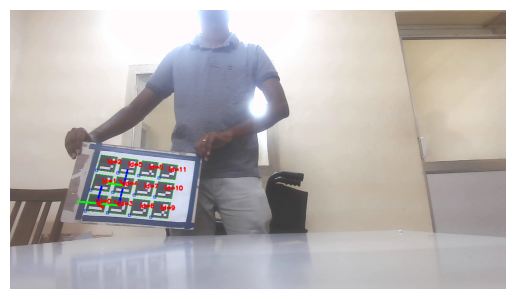

In [46]:
plt.imshow(_img)
plt.axis('off')
plt.savefig('calibration_board.png', dpi = 300, bbox_inches='tight')